In [41]:
def min_changes(str1, str2):
    len_str1 = len(str1) + 1
    len_str2 = len(str2) + 1

    # Create a matrix to store the minimum changes
    matrix = [[0] * len_str2 for _ in range(len_str1)]

    # Initialize the matrix with the cost of converting an empty string to str2
    for i in range(len_str2):
        matrix[0][i] = i

    # Initialize the matrix with the cost of converting str1 to an empty string
    for i in range(len_str1):
        matrix[i][0] = i

    # Fill in the matrix based on the minimum cost of transformations
    for i in range(1, len_str1):
        for j in range(1, len_str2):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,      # Deletion
                matrix[i][j - 1] + 1,      # Insertion
                matrix[i - 1][j - 1] + cost  # Substitution
            )

    # The bottom-right cell of the matrix contains the minimum changes
    return matrix[-1][-1]

# Example usage:
str1 = "kitten"
str2 = "sitting"
result = min_changes(str1, str2)
print(f"The minimum number of changes to transform '{str1}' into '{str2}' is: {result}")


The minimum number of changes to transform 'kitten' into 'sitting' is: 3


In [54]:
import numpy as np

detections = np.load("./data/detections.npy", allow_pickle=True).item()

success = 0
total = len(detections.keys())

keys = []

for key in detections.keys():
    desired = key.split(".")[0]
    if desired in detections[key]:
        success = success + 1
    c = []
    for a in detections[key]:
        c.append(min_changes(a, desired))
    if len(c) > 0:
        keys.append(min(c))
    else:
        keys.append(-1)
print(f'Total: {total}, Correct: {success}, Percentage: {success / total * 100} %')


Total: 2801, Correct: 620, Percentage: 22.134951802927528 %


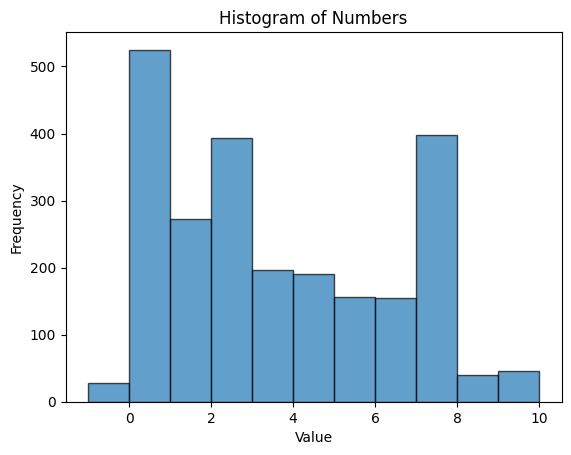

In [48]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(keys, bins=range(min(keys), max(keys) + 1), edgecolor='black', alpha=0.7)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numbers')

# Show the plot
plt.show()

In [49]:
detections

{'KGV-725.jpg': ['KGY7I'],
 'RMR-294.jpg': ['FP MP-294'],
 'IRG-756.jpg': ['FZBS'],
 'IHX-268.jpg': ['IHX-268'],
 'P-04356 22.jpg': ['FI'],
 'OT 93-62.jpg': ['T'],
 'BPO-074.jpg': ['', ''],
 'AA DK-403.jpg': [''],
 'ECY-610.jpg': ['RYL-685'],
 'DAP-285.jpg': ['LAF2B'],
 'SXA-869.jpg': ['', 'SKA-869'],
 'EVD-244.jpg': ['L', 'LL'],
 'HHN-375.jpg': ['II ZZ-119', 'II ZZ-119', 'IIIS5'],
 'RIN-280.jpg': ['FI II-280', 'FI II-280'],
 'PFW-641.jpg': ['FFG41'],
 'AA CQ-859.jpg': ['', '', '', '', ''],
 'SMC-199.jpg': ['SM CI-991'],
 'PGG-419.jpg': ['FGG-419'],
 'FHH-848.jpg': ['FHH-848'],
 'HNR-738.jpg': ['BH NR-738'],
 'TAX-256.jpg': ['TK25S'],
 'Z-11888 21.jpg': [''],
 'ROK-603.jpg': ['FCI-803'],
 'GRW-954.jpg': ['EG FW-954'],
 'KHA-840.jpg': ['KI IA-84U'],
 'AA KB-231.jpg': ['AAKB231I'],
 'DUM-014.jpg': ['DUM-014'],
 'GKG-499.jpg': ['GRG-499'],
 'CBR-085.jpg': ['CEF-085'],
 'RTY-640.jpg': ['RTV-640', ''],
 'PDN-577.jpg': ['FE'],
 'JLJ-943.jpg': ['JLJ-943', 'ILJ-943'],
 'GEM-611.jpg': ['LQ EW-6